In [2]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

%matplotlib inline

## 先设置好一些参数，比如随机数的种子，样本数量

In [3]:
n_samples = 1500
random_state = 170

## Kmeans

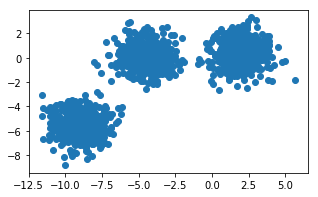

In [12]:
plt.figure(figsize=(5, 3))
n_samples = 1500
X, y = datasets.make_blobs(n_samples = n_samples, centers = 3, random_state = 170)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

### Kmeans 对cluster数目非常敏感

In [4]:
## 大家可以尝试对上面的数据做一下Kmeans 聚类，类的数目可以自己定义
## 比如
n_clusters = [2, 3, 4, 5]

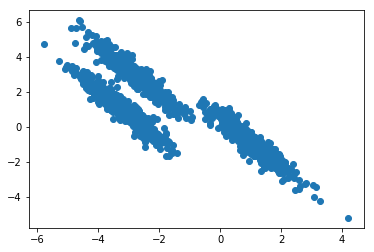

In [11]:
# 对数据进行一个转换，使得不再均匀分布， 有各向异性
# Kmeans的前提条件是cluster是圆形区域的

transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

## 对X_aniso 做Kmeans，看看有什么结论

plt.scatter(X_aniso[:, 0], X_aniso[:, 1])
plt.show()

## 圆形分布的数据

X shape: (1500, 2)
y shape: (1500,)


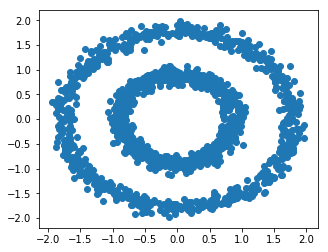

In [13]:
X, y = datasets.make_circles(n_samples = n_samples, factor = .5, noise = .05)
X = StandardScaler().fit_transform(X)
print "X shape: " + str(X.shape)
print "y shape: " + str( y.shape)

plt.figure(figsize = (5, 4))
plt.scatter(X[:,0], X[:,1])
plt.show()

In [7]:
# connectivity concept, kneighbors_graph
X_test = np.array([[0], [3], [1]])
A = kneighbors_graph(X_test, n_neighbors = 1, mode='connectivity', include_self = False)
print A.toarray()

[[ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]]


## 定义不同clustering算法的训练以及可视化函数

** 尝试用如下的模型对不同的数据做clustering **

In [8]:
# 利用kneighbors_graph， 建立 connectivity
connectivity = kneighbors_graph(X, n_neighbors = params["n_neighbors"])
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

# 定义kmeans，cluster数目根据传进来的参量
kmeans = cluster.KMeans(n_clusters = params["n_clusters"])

# 定义DBSCAN，eps和min_samples由传进来的params参量获得
dbscan = cluster.DBSCAN(eps=params['eps'], min_samples = params["min_samples"])

# 根据eulidean距离的average还是maximum得到 AgglomerativeClustering算法的两种average和complete linkage
average_linkage = cluster.AgglomerativeClustering(linkage = "average",
                                                  affinity = "euclidean",
                                                  n_clusters = params['n_clusters'],
                                                  connectivity = connectivity)

complete_linkage = cluster.AgglomerativeClustering(linkage = "complete",
                                                   affinity = "euclidean",
                                                   n_clusters = params['n_clusters'],
                                                   connectivity = connectivity)
# GMM算法
gmm = mixture.GaussianMixture(n_components = params['n_clusters'])

# Spectral clustering的算法
spectral = cluster.SpectralClustering(n_clusters = params['n_clusters'], 
                                      affinity = "nearest_neighbors")


## moon shape

X shape: (1500, 2)
y shape: (1500,)


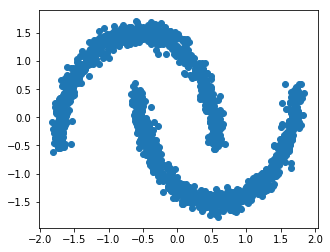

In [14]:
X, y = datasets.make_moons(n_samples = n_samples, noise = .05)
X = StandardScaler().fit_transform(X)
print "X shape: " + str(X.shape)
print "y shape: " + str( y.shape)

plt.figure(figsize = (5, 4))
plt.scatter(X[:,0], X[:,1])
plt.show()

## blobs

X shape: (1500, 2)
y shape: (1500,)


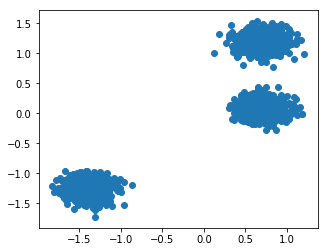

In [15]:
X, y = datasets.make_blobs(n_samples = n_samples, centers = 3, random_state=8)
X = StandardScaler().fit_transform(X)
print "X shape: " + str(X.shape)
print "y shape: " + str( y.shape)

plt.figure(figsize = (5, 4))
plt.scatter(X[:,0], X[:,1])
plt.show()

## blobs with varied variances

X shape: (1500, 2)
y shape: (1500,)


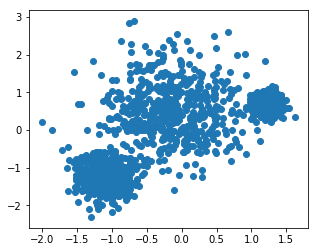

In [16]:
X, y = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

X = StandardScaler().fit_transform(X)
print "X shape: " + str(X.shape)
print "y shape: " + str( y.shape)

plt.figure(figsize = (5, 4))
plt.scatter(X[:,0], X[:,1])
plt.show()

## anisotropy 

X shape: (1500, 2)
y shape: (1500,)


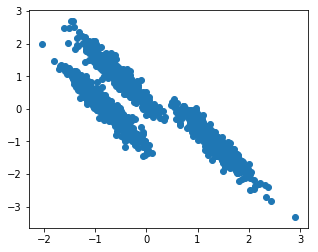

In [17]:
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation)
X = StandardScaler().fit_transform(X)
print "X shape: " + str(X.shape)
print "y shape: " + str( y.shape)

plt.figure(figsize = (5, 4))
plt.scatter(X[:,0], X[:,1])
plt.show()

## 随机样本

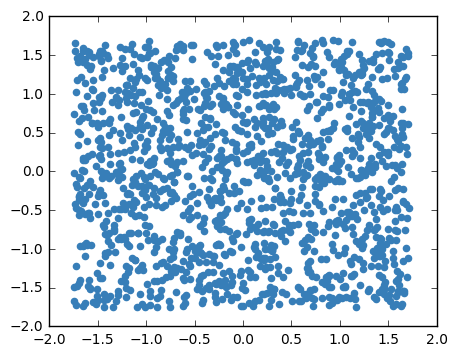

In [20]:
X, y = np.random.rand(n_samples, 2), None
X = StandardScaler().fit_transform(X)

plt.figure(figsize = (5, 4))
plt.scatter(X[:,0], X[:,1], color = '#377eb8')
plt.show()